---
 reading in file /home/sirfuser/devel/buildVM/sources/SIRF/data/examples/MR/simulated_MR_2D_cartesian_Grappa2.h5...
---
 pre-processing acquisition data...
---
 reconstructing...

Close Figures' 1 - 2 windows to continue...


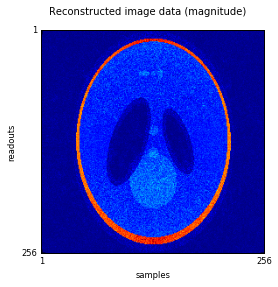

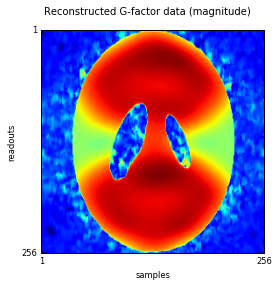

0

In [5]:
#'''
#Demonstrates GRAPPA reconstruction of undersampled data. 
#See function grappa_detail.py for an example showing more of the 
#workings and functionality of the SIRF code.
#
#Pre-requisites:
# 1) If the reconstruction engine is set to Gadgetron (default), then
#   this Python script needs to be able to access a listening gadgetron.
#    On the Virtual Machine, gadgetron is installed and the user just needs
#    to type 'gadgetron' in a terminal window.
#    On standalone systems, the user will need to have installed ISMRMRD
#   and gadgetron code.
#
# 2) An input data file from a GRAPPA MRI acquisition in the ISMRMRD format.
#    Example GRAPPA datasets:
#    a) 'meas_MID00108_FID57249_test_2D_2x.dat' is 
#       available from https://www.ccppetmr.ac.uk/downloads
#       This is in the manufacturer's raw data format and needs to be
#       converted to ISMRMRD format using 'siemens_to_ismrmrd'.
#       This executable is installed on the Virtual Machine.
#
#    b) A simulated ISMRMRD h5 file is available as default
#
#Usage:
# grappa_basic.py [--help | options]
#
#Options:
#  -f <file>, --file=<file>    raw data file
#                             [default: simulated_MR_2D_cartesian_Grappa2.h5]
#  -p <path>, --path=<path>    path to data files, defaults to data/examples/MR
#                              subfolder of SIRF root folder
#  -e <engn>, --engine=<engn>  reconstruction engine [default: Gadgetron]
#'''
#
## CCP PETMR Synergistic Image Reconstruction Framework (SIRF)
## Copyright 2015 - 2017 Rutherford Appleton Laboratory STFC.
## Copyright 2015 - 2017 University College London.
## Copyright 2015 - 2017 Physikalisch-Technische Bundesanstalt.
##
## This is software developed for the Collaborative Computational
## Project in Positron Emission Tomography and Magnetic Resonance imaging
## (http://www.ccppetmr.ac.uk/).
##
## Licensed under the Apache License, Version 2.0 (the "License");
##   you may not use this file except in compliance with the License.
##   You may obtain a copy of the License at
##       http://www.apache.org/licenses/LICENSE-2.0
##   Unless required by applicable law or agreed to in writing, software
##   distributed under the License is distributed on an "AS IS" BASIS,
##   WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
##   See the License for the specific language governing permissions and
##   limitations under the License.

#__version__ = '0.1.0'
from docopt import docopt
#args = docopt(__doc__, version=__version__)

# import engine module
#exec('from p' + args['--engine'] + ' import *')
from pGadgetron import *

data_file = 'simulated_MR_2D_cartesian_Grappa2.h5'
data_path = petmr_data_path('mr')


    
# locate the input data file
input_file = existing_filepath(data_path, data_file)
    
# Initially we create a container that points to the h5 file.
# Data is not read from file until the 'process' method of the
# reconstructor object is called.
    
# Create an acquisition container of type AcquisitionData
print('---\n reading in file %s...' % input_file)
acq_data = AcquisitionData(input_file)
    
    
# Pre-process this input data.
# (Currently this is a Python script that just sets up a 3 chain gadget.
# In the future it will be independent of the MR recon engine.)
print('---\n pre-processing acquisition data...')
preprocessed_data = preprocess_acquisition_data(acq_data)
    
    
# Perform reconstruction of the preprocessed data.
# 1. set the reconstruction to be for Cartesian GRAPPA data.
recon = CartesianGRAPPAReconstructor();
    
# 2. set the reconstruction input to be the data we just preprocessed.
recon.set_input(preprocessed_data);
    
# 3. run (i.e. 'process') the reconstruction.
print('---\n reconstructing...\n');
recon.process();
    

# retrieve reconstruced image and G-factor data
output = recon.get_output()

# show reconstructed image and G-factor data
output_array = output.as_array()
title = 'Reconstructed image data (magnitude)'
show_3D_array(abs(output_array[0::2,:,:]), suptitle = title, \
              xlabel = 'samples', ylabel = 'readouts', label = 'slice', \
              show = False)
title = 'Reconstructed G-factor data (magnitude)'
show_3D_array(abs(output_array[1::2,:,:]), suptitle = title, \
              xlabel = 'samples', ylabel = 'readouts', label = 'slice')


